<a href="https://colab.research.google.com/github/BingHungLee/Heat_Transfer/blob/master/CoolProp_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install CoolProp

     |████████████████████████████████| 4.0MB 2.8MB/s 


Reference : http://www.coolprop.org/coolprop/wrappers/Python/index.html#example-code-output

In [3]:
from __future__ import print_function
from CoolProp import AbstractState
from CoolProp.CoolProp import PhaseSI, PropsSI, get_global_param_string
import CoolProp.CoolProp as CoolProp
from CoolProp.HumidAirProp import HAPropsSI
from math import sin
print("**************** INFORMATION ***************")
print("This example was auto-generated by the language-agnostic dev/scripts/example_generator.py script written by Ian Bell")
print("CoolProp version:", get_global_param_string("version"))
print("CoolProp gitrevision:", get_global_param_string("gitrevision"))
print("CoolProp Fluids:", get_global_param_string("FluidsList"))
# See http://www.coolprop.org/coolprop/HighLevelAPI.html#table-of-string-inputs-to-propssi-function for a list of inputs to high-level interface
print("*********** HIGH LEVEL INTERFACE *****************")
print("Critical temperature of water:", PropsSI("Water", "Tcrit"), "K")
print("Boiling temperature of water at 101325 Pa:", PropsSI("T", "P", 101325, "Q", 0, "Water"), "K")
print("Phase of water at 101325 Pa and 300 K:", PhaseSI("P", 101325, "T", 300, "Water"))
print("c_p of water at 101325 Pa and 300 K:", PropsSI("C", "P", 101325, "T", 300, "Water"), "J/kg/K")
print("c_p of water (using derivatives) at 101325 Pa and 300 K:", PropsSI("d(H)/d(T)|P", "P", 101325, "T", 300, "Water"), "J/kg/K")
print("*********** HUMID AIR PROPERTIES *****************")
print("Humidity ratio of 50% rel. hum. air at 300 K, 101325 Pa:", HAPropsSI("W", "T", 300, "P", 101325, "R", 0.5), "kg_w/kg_da")
print("Relative humidity from last calculation:", HAPropsSI("R", "T", 300, "P", 101325, "W", HAPropsSI("W", "T", 300, "P", 101325, "R", 0.5)), "(fractional)")
print("*********** INCOMPRESSIBLE FLUID AND BRINES *****************")
print("Density of 50% (mass) ethylene glycol/water at 300 K, 101325 Pa:", PropsSI("D", "T", 300, "P", 101325, "INCOMP::MEG-50%"), "kg/m^3")
print("Viscosity of Therminol D12 at 350 K, 101325 Pa:", PropsSI("V", "T", 350, "P", 101325, "INCOMP::TD12"), "Pa-s")


**************** INFORMATION ***************
This example was auto-generated by the language-agnostic dev/scripts/example_generator.py script written by Ian Bell
CoolProp version: 6.3.0
CoolProp gitrevision: ba41b1434002b1fce6e596386861bca2a890fb6f
CoolProp Fluids: 1-Butene,Acetone,Air,Ammonia,Argon,Benzene,CarbonDioxide,CarbonMonoxide,CarbonylSulfide,CycloHexane,CycloPropane,Cyclopentane,D4,D5,D6,Deuterium,Dichloroethane,DiethylEther,DimethylCarbonate,DimethylEther,Ethane,Ethanol,EthylBenzene,Ethylene,EthyleneOxide,Fluorine,HFE143m,HeavyWater,Helium,Hydrogen,HydrogenChloride,HydrogenSulfide,IsoButane,IsoButene,Isohexane,Isopentane,Krypton,MD2M,MD3M,MD4M,MDM,MM,Methane,Methanol,MethylLinoleate,MethylLinolenate,MethylOleate,MethylPalmitate,MethylStearate,Neon,Neopentane,Nitrogen,NitrousOxide,Novec649,OrthoDeuterium,OrthoHydrogen,Oxygen,ParaDeuterium,ParaHydrogen,Propylene,Propyne,R11,R113,R114,R115,R116,R12,R123,R1233zd(E),R1234yf,R1234ze(E),R1234ze(Z),R124,R1243zf,R125,R13,R134a,R13I1,

In [7]:
import CoolProp.CoolProp as CP
fluid = 'Water'
pressure_at_critical_point = CP.PropsSI(fluid,'pcrit')
# Massic volume (in m^3/kg) is the inverse of density
# (or volumic mass in kg/m^3). Let's compute the massic volume of liquid
# at 1bar (1e5 Pa) of pressure
vL = 1/CP.PropsSI('D','P',1e5,'Q',0,fluid)
print("vL : ",vL)
# Same for saturated vapor
vG = 1/CP.PropsSI('D','P',1e5,'Q',1,fluid)
print("vG : ",vG)

vL :  0.0010431536977168567
vG :  1.6939276653849265


/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


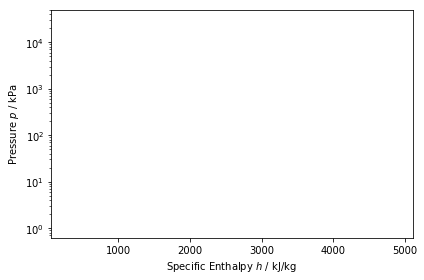

In [8]:
import CoolProp.Plots as CPP
ph_plot = CPP.PropertyPlot('Water','Ph')
ph_plot.savefig('enthalpy_pressure_graph_for_Water.png')